('PIL image size', (224, 224))
('image batch size', (1, 224, 224, 3))


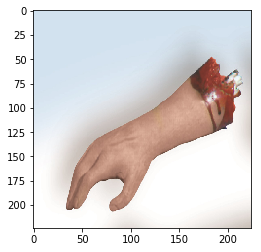

In [12]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
 
filename = '/Users/t0s00w8/Downloads/halloween_bloody_hand.jpeg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
#plt.imshow(original)
#plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in
(width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
#plt.imshow(np.uint8(numpy_image))
#plt.show()
#print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

Lets first get some predictions using the inception network. We are leaving the feed_forward layer and the softmax as-is as we are doing classification. But later on when we use it for transfer learning we just use the convolutional layers by setting the include_top as False(This just leaves the convolutional models in)

In [11]:
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = InceptionV3(weights='imagenet')
x = preprocess_input(image_batch)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

('Predicted:', [(u'n03950228', u'pitcher', 1.0), (u'n04131690', u'saltshaker', 3.1482806e-11), (u'n04286575', u'spotlight', 1.0656722e-16)])


In [13]:
x = preprocess_input(image_batch)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

('Predicted:', [(u'n03047690', u'clog', 0.9977507), (u'n03950228', u'pitcher', 0.0011863534), (u'n01924916', u'flatworm', 0.0010494965)])


In [17]:
# logic to pull down the data from urls and cache them.
# then load them up into numpy objects
import urllib
import os
import hashlib
data_dir = "./data"
def download_data(urls=None, data_dir=".", image_dims=(224, 224)):
    data = []
    for url in urls:
        img_pth = data_dir + "/" + hashlib.sha1(url).hexdigest() + "." + url.split["."][-1]
        if not os.path.exists(img_pth):
            urllib.urlretrieve("http://www.digimouth.com/news/media/2011/09/google-logo.jpg", img_pth)
        image = cv2.imread(image_pth)
        image = cv2.resize(image, image_dims)
        image = img_to_array(image)
        data.append(image)
    return data
        
    
    

In [ ]:
download_data()